# Shark attacks and climate change

## Import libraries and data

In [1]:
# import libreries
import pandas as pd
import numpy as np
import re
import warnings

# libraries for map plotting 
import geopandas
import geopy 
import matplotlib.pyplot as plt
from geodatasets import get_path


# import functions 
from functions import *

In [2]:
#Import data

url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'

shark_attack_raw = pd.read_excel(url)

shark_attack_raw

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


## Data processing

In [3]:
# Clean column names
shark_attack_raw = clean_columns_names(shark_attack_raw)

# Clean irrelevant columns
shark_attack_clean = columns_drops(shark_attack_raw, [ 'year', 'type', 'name', 'unnamed:_11', 'time', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'])

In [4]:
# Delete rows with null values
shark_attack_clean = drop_rows_nulls(shark_attack_clean, thresh=2)

In [5]:
# Delete duplicates  
shark_attack_clean.drop_duplicates(inplace=True)

We create  new data set to start editing the values

In [6]:
# Clean dates
shark_attack_values = clean_and_filter_dates(shark_attack_clean, 'date', '1989')

In [7]:
# Categorize injury
shark_attack_values['injury'] = shark_attack_values['injury'].apply(categorize_injury)

In [8]:
# Filter activity
shark_attack_values['activity'] = shark_attack_values['activity'].apply(filter_activity)

In [9]:
# Clean columns with geographical information
shark_attack_values['country'] = shark_attack_values['country'].apply(clean_strings)
shark_attack_values['state'] = shark_attack_values['state'].apply(clean_strings)
shark_attack_values['location'] = shark_attack_values['location'].apply(clean_strings)

In [10]:
# Generate case numbers
shark_attack_values = generate_case_numbers(shark_attack_values)

## Calculate longitude and latitude

We want to use geopy to standardise the location information and obtain the latitude and longitude to represent the attacks on a map. 

In [11]:
# We start by saving the cleaned data in a new csv file
shark_attack_values.to_csv('shark_attack_clean.csv')



We feed that file to the get_coordinates function to obtain the latitude and longitude coordinates.

We don't want to recalculate this coordinates, as the geopy query takes a long time to process. 
Thus, the followin line is commented:  

In [ ]:
# pd.read_csv('shark_attack_clean.csv', 'shark_attack_clean_with_coordinates.csv')

## Análisis

In [2]:
# Load clean data with coordinates
shark_attack_total = pd.read_csv("shark_attack_clean_with_coordinates.csv")

NameError: name 'pd' is not defined

In [ ]:
# Let's analyse the distribution of attacks by year. 
# If our hypothesis is correct we will observe an increase during the last decades. 

shark_year_temp = temp_date_df(shark_attack_total, 'date')
shark_year_temp

,year,month,day
0,2024,3,15
1,2024,3,4
2,2024,3,2
3,2024,2,25
4,2024,2,14
...,...,...,...
2958,1990,4,1
2959,1990,3,5
2960,1990,2,17
2961,1990,2,5


In [37]:
shark_year_grafico = shark_year_temp.groupby('year').count()
shark_year_grafico

,month,day
year,,
1990,37,37
1991,36,36
1992,49,49
1993,39,39
1994,50,50
1995,68,68
1996,54,54
1997,54,54
1998,55,55


In [42]:
shark_year_grafico.columns

Index(['month', 'day'], dtype='object')

In [43]:
#Añadimos una columna para contar los ataques
count_by_year = shark_year_temp.groupby('year').size().reset_index(name='attack_count')
temp_date_with_counts = shark_year_grafico.merge(count_by_year, on='year', how='left')

In [47]:
#Usamos dataframe
temp_date_with_counts.columns

Index(['year', 'month', 'day', 'attack_count'], dtype='object')

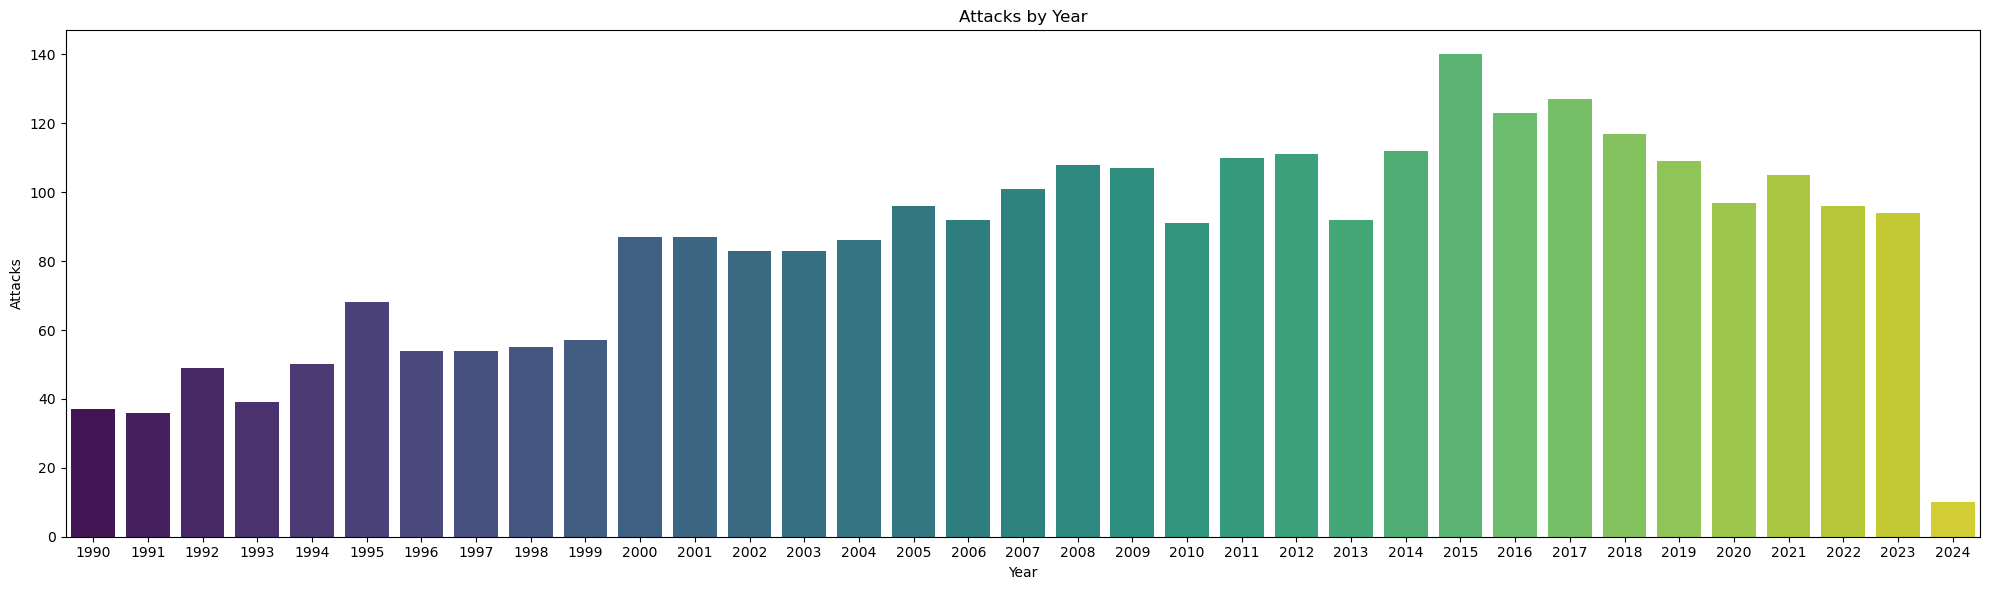

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.barplot(x='year', y='attack_count', data= temp_date_with_counts, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Attacks')
plt.title('Attacks by Year')
plt.tight_layout()
plt.show()

In [67]:
# Contar cuántos ataques están clasificados como 'Fatal' y 'No Fatal'
print(shark_attack_total['injury_category'].value_counts())


injury_category
No Fatal    2963
Name: count, dtype: int64


In [68]:
shark_attack_total['activity'].unique()

array(['Swimming', 'Surfing', 'Unknown', 'Fishing', 'Spearfishing',
       'Free', 'Foil', 'Wading', 'Snorkeling', 'Paddle', 'Scuba', 'Kayak',
       'Towing', 'Boogie', 'Freediving', 'Sitting', 'Standing', 'Jumped',
       'Diving', 'Windsurfing', 'Kite-surfing', 'Surf-sking',
       'Spearishing', 'Diving/shark', 'Surf', 'Shipwreck', 'Kayaking',
       'Paddleboarding', 'Lobstering', 'Lifeguard', 'Scalloping',
       'Playing', 'Feeding', 'Fihing', 'Surface', 'Floating', 'Wing',
       'Swimmingq', 'Fishing,', 'Harassing', 'Squatting', 'Moving',
       'Canoeing', 'Parasailing', 'Kite', 'Baiting', 'Boggie', 'Stand',
       'Tagging', 'Body', 'Fell', 'Foil-boarding', 'Sightseeing',
       'Treading', 'Skimboarding', 'Stand-up', 'Swimming/',
       'Body-surfing', 'Picking', 'Paddling', 'Swimming/standing',
       'Putting', 'Walking', 'Surf-skiing', 'Foilboarding', 'Cleaning',
       'Night', 'Swimming,', 'Sup', 'Touching', 'Photo', 'Kakaying',
       'Grabbing', 'Cage', 'Surfng', 'Te

In [72]:
shark_attack_total.columns

Index(['date', 'country', 'state', 'location', 'sex', 'age', 'species_',
       'injuries', 'activitys', 'case_number', 'injury_category'],
      dtype='object')

In [73]:
shark_attack_total['injury'].value_counts()

,injuries
0,No Fatal
1,No Fatal
2,No Fatal
3,No Fatal
4,No Fatal
5,No Fatal
6,No Fatal
7,No Fatal
8,No Fatal
9,No Fatal


In [113]:
# 1. Aplicar la función categorize_injury para categorizar las actividades en 'Fatal' o 'No Fatal'
shark_attack_total['injury_category'] = shark_attack_total['injuries'].apply(categorize_injury)


# 2. Filtrar solo los ataques mortales (Fatal)
fatal_attacks = shark_attack_total[shark_attack_total['injury_category'] == 'Fatal']

# 3. Contar la cantidad de ataques mortales según la actividad
fatal_attacks_by_activity = fatal_attacks.groupby('activitys').size().sort_values(ascending=False)

# Seleccionar las 5 actividades más mortales
top_5_fatal_attacks = fatal_attacks_by_activity.head(5)


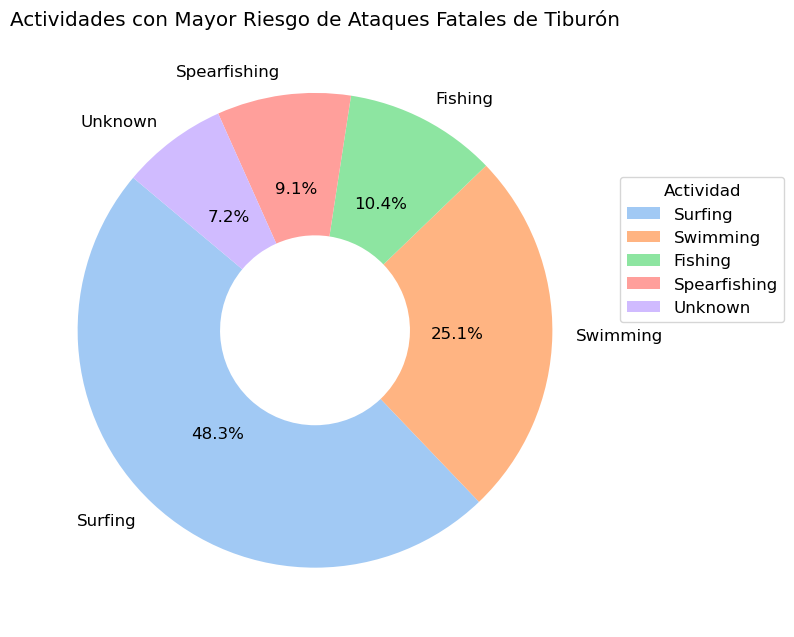

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns  # Para utilizar paletas de colores predefinidas

# ... (tu código anterior)

# Utilizar una paleta de colores de Seaborn
sns.set_palette("muted")  # Puedes elegir otras paletas como "bright", "muted", etc.

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(top_5_fatal_attacks, labels=top_5_fatal_attacks.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.6))  # Aumentamos el ancho de las porciones

# Título y leyenda
plt.title("Actividades con Mayor Riesgo de Ataques Fatales de Tiburón")
plt.legend(title="Actividad", loc="lower left", bbox_to_anchor=(1, 0.5))

# Ajustes estéticos
plt.rcParams['font.size'] = 12  # Aumentamos el tamaño de la fuente
plt.tight_layout()

plt.show()